# Optional Lab - Softmax Function
In this lab, we will explore the softmax function. This function is used in both Softmax Regression and in Neural Networks when solving Multiclass Classification problems.  

<center>  <img  src="./images/C2_W2_Softmax_Header.PNG" width="600" />  <center/>

  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

> **Note**: 일반적으로 이 강좌에서 노트북은 0으로 시작하고 N-1로 끝나는, $\sum_{i=0}^{N-1}$ 규칙을 사용하는 반면, 강의는 1로 시작하고 N으로 끝납니다, $\sum_{i=1}^{N}$. 이는 강의 중에 코드가 일반적으로 0부터 반복을 시작하기 때문입니다. 1부터 N까지 계산하면 더 깔끔하고 간결한 방정식이 생성됩니다. 이 노트북에는 일반적인 실스비보다 더 많은 방정식이 포함되어 있으므로 관례를 깨고 1부터 N까지 계산됩니다.

## Softmax Function
Softmax 회귀와 Softmax 출력이 있는 신경망 모두에서 N개의 출력이 생성되고 하나의 출력이 예측 범주로 선택됩니다. 두 경우 모두 벡터 $\mathbf{z}$는 소프트맥스 함수에 적용되는 선형 함수에 의해 생성됩니다. 소프트맥스 함수는 $\mathbf{z}$를 아래 설명된 확률 분포로 변환합니다. 소프트맥스를 적용한 후 각 출력은 0과 1 사이가 되며 출력은 합이 1이 되므로 확률로 해석할 수 있습니다. 더 큰 입력은 더 큰 출력 확률에 해당합니다.
<center>  <img  src="./images/C2_W2_SoftmaxReg_NN.png" width="600" />  

Softmax 함수는 다음과 같이 작성할 수 있습니다:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$
출력 $\mathbf{a}$는 길이 N의 벡터이므로 소프트맥스 회귀의 경우 다음과 같이 작성할 수도 있습니다.:
\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}


이는 출력이 확률의 벡터임을 보여줍니다. 첫 번째 항목은 입력 $\mathbf{x}$ 및 매개변수 $\mathbf{w}$ 및 $\mathbf{b}$가 주어진 경우 입력이 첫 번째 범주일 확률입니다.
NumPy 구현을 만들어 보겠습니다:

In [3]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

아래에서는 슬라이더를 사용하여 `z` 입력 값을 변경합니다.

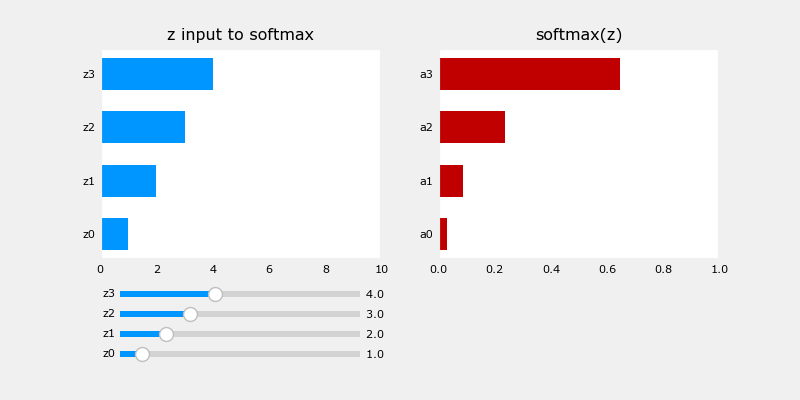

In [4]:
plt.close("all")
plt_softmax(my_softmax)

위의 z 값을 변경할 때 주의해야 할 몇 가지 사항이 있습니다:
* 소프트맥스 분자의 지수는 값의 작은 차이를 확대합니다.
* 출력 값의 합은 1이 됩니다.
* 소프트맥스는 모든 출력에 걸쳐 있습니다. 예를 들어 `z0`을 변경하면 `a0`-`a3` 값이 변경됩니다. 이를 단일 입력과 단일 출력을 갖는 ReLU 또는 Sigmoid와 같은 다른 활성화와 비교해 보세요.


## Cost
<center> <img  src="./images/C2_W2_SoftMaxCost.png" width="400" />    <center/>

교차 엔트로피(cross-entropy) 손실인 Softmax와 관련된 손실 함수는 다음과 같습니다.:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

여기서 y는 이 예의 대상 범주이고 $\mathbf{a}$는 소프트맥스 함수의 출력입니다. 특히 $\mathbf{a}$의 값은 합이 1이 되는 확률입니다.
>**Recall:** 이 과정에서 손실(loss)은 하나의 예이고 비용(cost)은 모든 예를 포함합니다.
 
위의 (3)에서 목표에 해당하는 라인만 손실에 기여하고 다른 라인은 0입니다. 비용 방정식을 작성하려면 인덱스가 목표와 일치하면 1이 되고 그렇지 않으면 0이 되는 '지표 함수(indicator function)'가 필요합니다.
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
이제 비용(cost)은 다음과 같습니다:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

여기서 $m$은 예제 수이고 $N$은 출력 수입니다. 이것은 모든 손실의 평균입니다.


## Tensorflow
본 실습에서는 Tensorflow에서 소프트맥스, 교차 엔트로피 손실을 구현하는 두 가지 방법인 '명백한' 방법과 '선호되는' 방법에 대해 논의합니다. 전자가 가장 간단하지만 후자가 수치적으로 더 안정적입니다.

멀티클래스 분류 모델을 훈련하기 위한 데이터세트를 만드는 것부터 시작해 보겠습니다.

In [5]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

### The *Obvious* organization

아래 모델은 최종 Dense 레이어의 활성화로 소프트맥스를 사용하여 구현되었습니다.
손실 함수는 `compile` 지시문에 별도로 지정됩니다.

손실 함수는 `SparseCategoricalCrossentropy`입니다. 이 손실은 위의 (3)에 설명되어 있습니다. 이 모델에서 softmax는 마지막 레이어에서 발생합니다. 손실 함수는 확률 벡터인 softmax 출력을 사용합니다.

In [6]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)
        

2023-09-17 11:08:00.663320: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-09-17 11:08:00.663357: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-17 11:08:00.663367: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-17 11:08:00.663442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-17 11:08:00.663471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-09-17 11:08:01.137614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 4ms/step - loss: 0.6678
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.2058
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 0.1198
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0880
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0720
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0631
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0573
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0528
Epoch 9/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0466


softmax는 출력 레이어에 통합되어 있으므로 출력은 확률 벡터입니다.

In [7]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 1ms/step
[[6.86e-04 2.61e-04 9.60e-01 3.93e-02]
 [9.93e-01 7.22e-03 2.33e-05 1.06e-09]]
largest value 1.0 smallest value 5.882642e-17


2023-09-17 11:08:35.922568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### Preferred <img align="Right" src="./images/C2_W2_softmax_accurate.png"  style=" width:400px; padding: 10px 20px ; ">
강의 내용을 떠올려 보면 훈련 중에 소프트맥스와 손실을 결합하면 보다 안정적이고 정확한 결과를 얻을 수 있습니다. 이는 여기에 표시된 '선호' 방법에 의해 활성화됩니다.

선호되는 방법에서는 최종 레이어가 선형 활성화를 갖습니다. 역사적인 이유로 이 형식의 출력을 *logits* 라고 합니다. 손실 함수에는 `from_logits = True`라는 추가 인수가 있습니다. 이는 소프트맥스 연산이 손실 계산에 포함되어야 함을 손실 함수에 알립니다. 이를 통해 최적화된 구현이 가능합니다.

In [8]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
        

Epoch 1/10


2023-09-17 11:12:06.074980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 4ms/step - loss: 0.7864
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.2312
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 0.1313
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0952
Epoch 5/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0782
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0677
Epoch 7/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0613
Epoch 8/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0561
Epoch 9/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0523
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0490


#### Output Handling
선호되는 모델에서 출력은 확률이 아니지만 큰 음수에서 큰 양수까지 범위가 될 수 있습니다. 확률을 예상하는 예측을 수행할 때 출력은 소프트맥스를 통해 전송되어야 합니다.
선호하는 모델 출력을 살펴보겠습니다:

In [9]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 1ms/step
two example output vectors:
 [[ -2.15  -3.05   4.72   1.65]
 [  5.8    1.54  -4.61 -14.46]]
largest value 23.919933 smallest value -25.03715


2023-09-17 11:12:48.713871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


출력 예측은 확률이 아닙니다!
원하는 출력이 확률인 경우 출력은 [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax)로 처리되어야 합니다.

In [10]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[9.94e-04 4.01e-04 9.54e-01 4.42e-02]
 [9.86e-01 1.39e-02 2.96e-05 1.58e-09]]
largest value 1.0 smallest value 4.1970697e-16


가능성이 가장 높은 카테고리를 선택하기 위해 소프트맥스는 필요하지 않습니다. [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)를 사용하여 가장 큰 출력의 인덱스를 찾을 수 있습니다.

In [11]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-2.15 -3.05  4.72  1.65], category: 2
[  5.8    1.54  -4.61 -14.46], category: 0
[  4.25   1.54  -3.46 -11.11], category: 0
[ 0.36  5.16 -3.22 -1.82], category: 1
[ 1.22 -7.37  5.39 -6.66], category: 2


## SparseCategorialCrossentropy or CategoricalCrossEntropy
Tensorflow에는 목표 값에 대한 두 가지 잠재적 형식이 있으며, 손실 선택에 따라 예상되는 형식이 정의됩니다.
- SparseCategorialCrossentropy: 대상이 인덱스에 해당하는 정수일 것으로 예상합니다. 예를 들어 잠재적인 목표 값이 10개인 경우 y는 0에서 9 사이입니다.
- CategoricalCrossEntropy: 예제의 대상 값이 원-핫 인코딩될 것으로 예상합니다. 여기서 대상 인덱스의 값은 1이고 다른 N-1 항목은 0입니다. 10개의 잠재적 목표 값이 있고 목표가 2인 예는 [0,0,1,0,0,0,0,0,0,0]입니다.

## Congratulations!
이 실습에서는 당신이

* 소프트맥스 함수와 softmax 회귀 및 신경망의 softmax 활성화의 사용법에 더 익숙해졌습니다.
* Tensorflow에서 선호하는 모델 구성을 배웠습니다.
  * 최종 레이어에서는 활성화 함수를 사용하지 않습니다(선형 활성화와 동일).
  * SparseCategoricalCrossentropy 손실 함수를 사용
  * from_logits=True 를 사용하세요.

* ReLU 및 Sigmoid와 달리, softmax는 여러 출력들에 퍼져 있음을 인식했습니다.